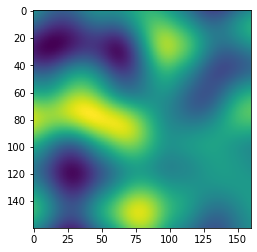

In [2]:
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise
from PIL import Image, ImageDraw, ImageFilter
import csv
from random import choice

TILESIZE = 16
TILESIZE_RENDER = 64
CHUNK_SIZE = 16
N_CHUNKS = 10
MAP_SIZE = N_CHUNKS*CHUNK_SIZE

blue = (65,105,225)
green = (34,139,34)
beach = (238, 214, 175)
snow = (255, 250, 250)
mountain = (139, 137, 137)

noise = PerlinNoise(octaves=3)

xpix, ypix = MAP_SIZE, MAP_SIZE
world = []
for i in range(xpix):
    row = []
    for j in range(ypix):
        noise_val = noise([i/xpix, j/ypix])# - noise([i/xpix, j/ypix])%0.05
        row.append(noise_val)
    world.append(row)

plt.imshow(world)
plt.show()

world_noise = world

img = Image.new('RGB', (MAP_SIZE*TILESIZE,MAP_SIZE*TILESIZE), color = 'white')
tile = Image.open('../graphics/test/grass.png')
tile_hot = Image.open('../graphics/test/grass_hot.png')
tile_cold = Image.open('../graphics/test/grass_cold.png')

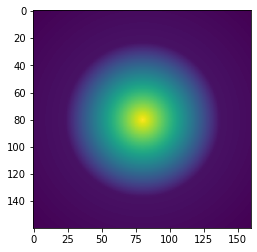

In [3]:
import numpy as np
import math

center_x, center_y = (MAP_SIZE)/2, (MAP_SIZE)/2
circle_grad = np.zeros_like(world)

for y in range(MAP_SIZE):
    for x in range(MAP_SIZE):
        distx = abs(x - center_x)
        disty = abs(y - center_y)
        dist = math.sqrt(distx*distx + disty*disty)
        circle_grad[y][x] = dist

# get it between -1 and 1
max_grad = np.max(circle_grad)
circle_grad = circle_grad / max_grad
circle_grad -= 0.5
circle_grad *= 2.0
circle_grad = -circle_grad

# shrink gradient
for y in range(MAP_SIZE):
    for x in range(MAP_SIZE):
        if circle_grad[y][x] > 0:
            circle_grad[y][x] *= 20

max_grad = np.max(circle_grad)
circle_grad = circle_grad / max_grad

plt.imshow(circle_grad)

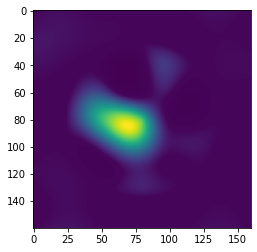

In [4]:
world_noise = np.zeros_like(np.asarray(world))

for i in range(MAP_SIZE):
    for j in range(MAP_SIZE):
        world_noise[i][j] = (world[i][j] * circle_grad[i][j])
        if world_noise[i][j] > 0:
            world_noise[i][j] *= 20

# get it between 0 and 1
max_grad = np.max(world_noise)
world_noise = world_noise / max_grad

plt.imshow(world_noise)

In [5]:

for i in range(len(world_noise)):
    for j in range(len(world_noise[i])):
        new_tile = tile.copy()
        for x in range(new_tile.size[0]):
            for y in range(new_tile.size[1]):
                pix = new_tile.getpixel((x,y))
                if world_noise[i][j] < 0.1: new_tile.putpixel((x,y),blue) # Water
                elif 0.1 <= world_noise[i][j] < 0.2: new_tile.putpixel((x,y),beach) # Beach
                elif 0.2 <= world_noise[i][j] < 0.6: new_tile.putpixel((x,y),green) # Green
                elif 0.6 <= world_noise[i][j] < 0.8: new_tile.putpixel((x,y),mountain) # Mountain
                elif 0.8 <= world_noise[i][j]: new_tile.putpixel((x,y),snow) # Snow
        img.paste(new_tile, (TILESIZE*j,TILESIZE*i))

img.save('../graphics/tilemap/map.png', quality=100)

for i in range(N_CHUNKS-1):
    for j in range(N_CHUNKS-1):
        chunk = img.crop((i*TILESIZE*CHUNK_SIZE, j*TILESIZE*CHUNK_SIZE, (i+1)*TILESIZE*CHUNK_SIZE, (j+1)*TILESIZE*CHUNK_SIZE))
        chunk_no = str('[' + str(i) + ';' + str(j) + ']')
        chunk.save(str('../graphics/tilemap/chunks/' + chunk_no + '.png'), quality=100)


with open("../map/out.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(world)

In [1]:
def test(a):
    return a

In [3]:
import pygame
pygame.image.open()

tuple

In [3]:
with open("../graphics/tilemap/chunks/[0;0].png") as f:
    print('a')

a


In [2]:
import pygame

a = '../graphics/tilemap/chunks/[0;0].png'
b = pygame.image.load(a)

In [2]:
b

<Surface(256x256x24 SW)>